In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\shobhit\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN','LNKD']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [3]:
LNKD.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,221.383096,224.157976,217.966627,220.893334,1984386.904762,220.893334
std,29.546366,29.622844,29.991473,29.766628,3125485.949204,29.766628
min,107.199997,115.349998,102.809998,108.379997,205900.000000,108.379997
25%,196.847503,198.672500,194.044999,196.297504,1106025.000000,196.297504
50%,216.895004,218.245002,215.049996,216.314995,1417900.000000,216.314995
75%,249.939999,253.532498,247.002502,249.812500,1951000.000000,249.812500
max,272.309998,276.179993,270.100006,270.760010,43949900.000000,270.760010


In [4]:
LNKD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-02-09 to 2016-02-08
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


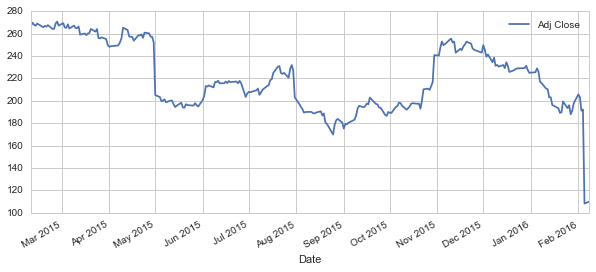

In [5]:
# Let's see a historical view of the closing price
LNKD['Adj Close'].plot(legend=True,figsize=(10,4))

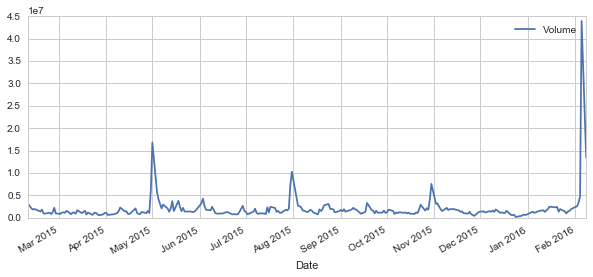

In [6]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
LNKD['Volume'].plot(legend=True,figsize=(10,4))

In [7]:


#  plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    LNKD[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

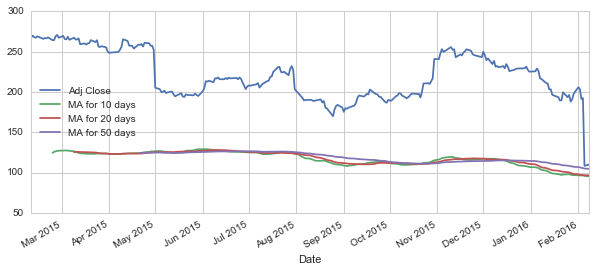

In [8]:
LNKD[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

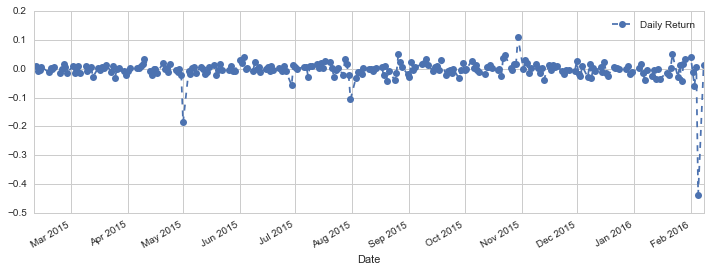

In [9]:
# 
LNKD['Daily Return'] = LNKD['Adj Close'].pct_change()
# plot the daily return percentage
LNKD['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

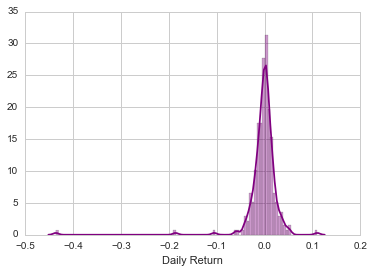

In [10]:

sns.distplot(LNKD['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

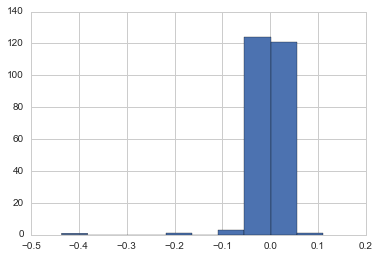

In [11]:
# Could have also done:
LNKD['Daily Return'].hist()

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN','LNKD'],'yahoo',start,end)['Adj Close']

In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

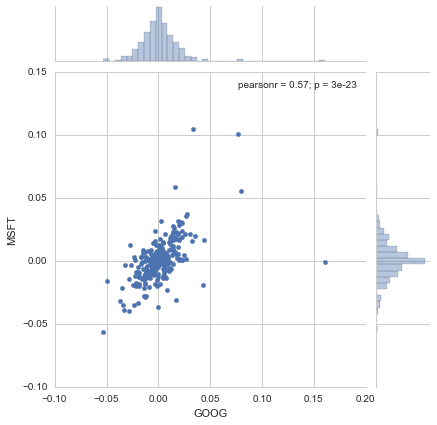

In [14]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

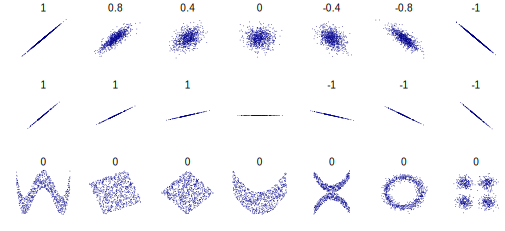

In [15]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

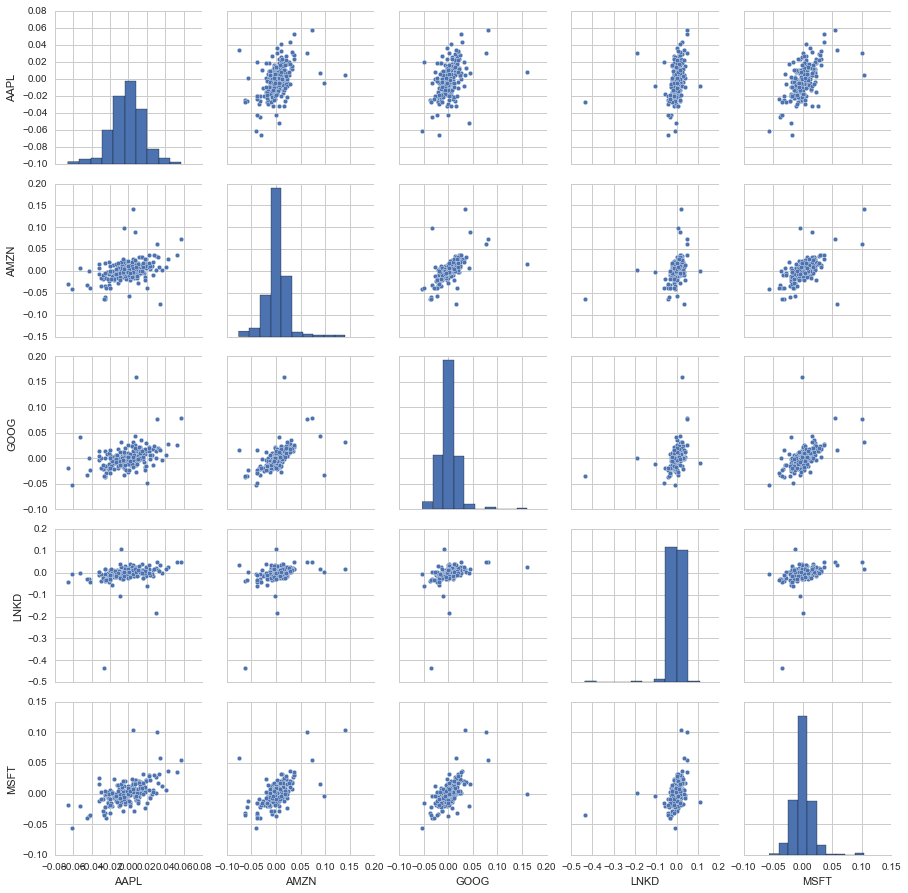

In [16]:
sns.pairplot(tech_rets.dropna())

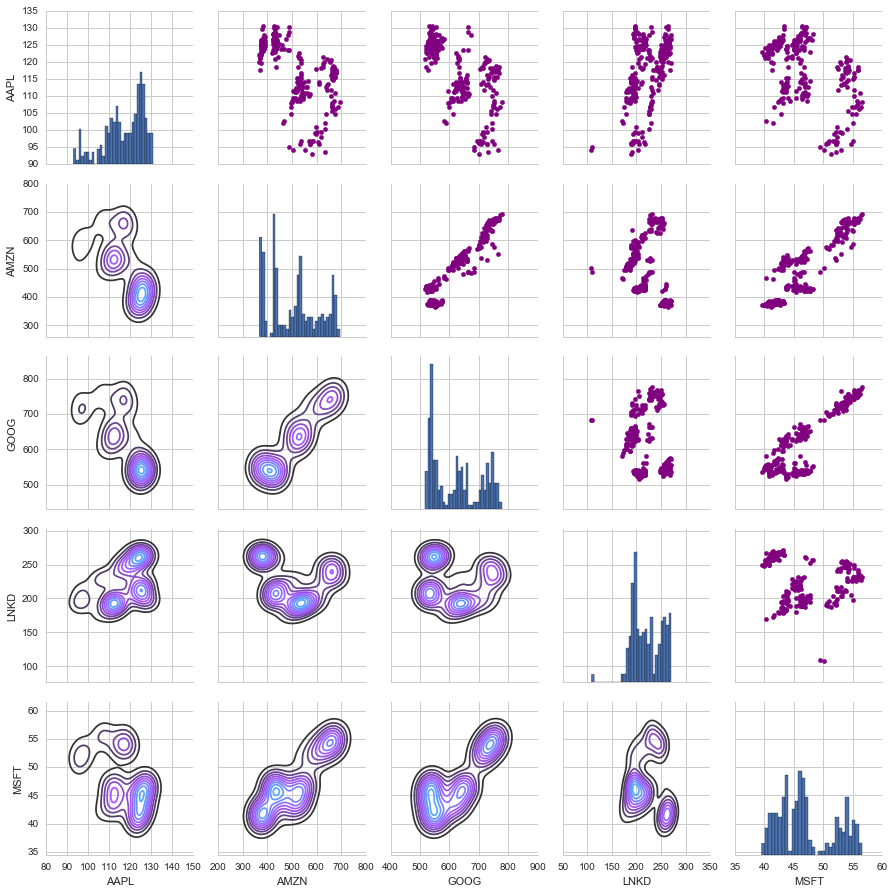

In [17]:

returns_fig = sns.PairGrid(closing_df)


returns_fig.map_upper(plt.scatter,color='purple')

#  the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#  a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\shobhit\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\shobhit\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


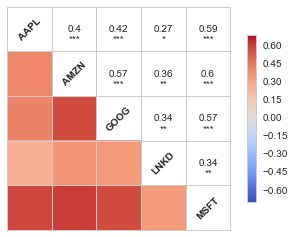

In [18]:
sns.corrplot(tech_rets.dropna(),annot=True)